In [1]:
#problem 4


import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import math as m


#Slopes of the line in K/m
a1 = -6.5*10**(-3) 
a2 = 3*10**(-3) 
a3 = -4.5*10**(-3) 
a4 = 4*10**(-3) 

#heights of 1976 in m
h0 = 0
h1 = 11e3
h2 = 25e3
h3 = 47e3
h4 = 53e3
h5 = 79e3
h6 = 90e3
h7 = 105e3

#temperatures in K
t0 = 288.16 
t1 = 216.66 #temp for the straight portion (t1i = t1f)
t2 = 282.66 #temp for the straight portion (t2i = t2f)
t3 = 165.66 #temp for the straight portion (t3i = t3f)
t4 = 225.66 

#Defining variables
g0 = 9.81 #m/s
R = 287 #j/(kg*k)
P1 = 1.01325e5
rho1 = 1.225 #kg/m^3

#Problem 1:


def Atmos1976(h):          #plug in h (atmosphere) to find temp
    if (h <= 11e3): #Sloped Regions
        T = a1*(h-h0)+t0
        P = P1*((T/t0)**(-g0/(a1*R)))
        Rho = rho1*((T/t0)**((-g0/(a1*R))-1))
        return T, P, Rho;

    elif (h > 11e3 and h <= 25e3): #Isothermal (straight) Regions
        T = 216.66
        P = 22615.568693731882 * m.e**((-g0/(R*T))*(h-h1))  #each number is the max of last code
        Rho = 0.3636486218188974 * P / (P1*((T/t0)**(-g0/(a1*R))))  
        return T, P, Rho;
    
    elif (h > 25e3 and h <= 47e3): #Sloped Regions
        T = a2*(h-h2)+t1
        P = 2484.173963954718 * ((T/t1)**((-g0/(a2*R)))) 
        Rho = 0.039944449356292225 * ((T/t1)**((-g0/(a2*R))-1))
        return T, P, Rho;

    elif (h > 47e3 and h <= 53e3): #Isothermal (straight) Regions 
        T = 282.66
        P = 120.05224490380778 * (m.e**((-g0/(R*T))*(h-h3)))
        Rho = 0.0014796503549390151 * P / (120.05224490380778*((T/t2)**(-g0/(a3*R))))
        return T, P, Rho; #off by 4 on P and .2e-3 on rho

    elif (h > 53e3 and h <= 79e3): #Sloped Regions
        T = a3*(h-h4)+t2
        P = 58.11163463722042 * ((T/t2)**((-g0/(a3*R))))
        Rho = 0.0007162290125098886 * ((T/t2)**((-g0/(a3*R))-1))
        return T, P, Rho;
    
    elif (h > 79e3 and h <= 90e3): #Isothermal (straight) Regions
        T = 165.66
        P = 1.0038721832475015 * (m.e**((-g0/(R*T))*(h-h5)))
        Rho = (2.1111249337419792e-05) * P / (1.0038721832475015*((T/t2)**(-g0/(a3*R))))
        return T, P, Rho;
    
    elif (h > 90e3 and h <= 105e3): #Sloped Regions
        T = a4*(h-h6)+t3
        P = 0.10374676811558331 * ((T/t3)**((-g0/(a4*R))))
        Rho = 0.00012629750262085955 * ((T/t3)**((-g0/(a4*R))-1))
        return T, P, Rho;

#answers are in meters, convert to ft
print(Atmos1976(0))
print(Atmos1976(4572))
print(Atmos1976(9144)) 


(288.16, 101325.0, 1.225)
(258.442, 57165.940548053855, 0.7705972091798977)
(228.72400000000002, 30071.78242958922, 0.45803704570011594)


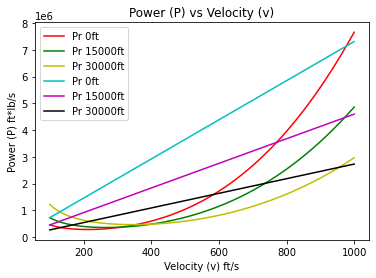

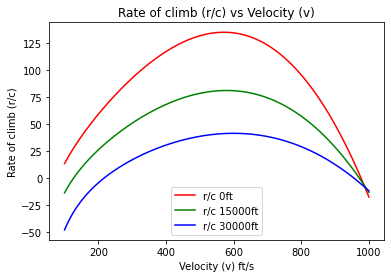

135.00025559232557
81.07573921773114
41.43290533306555


In [2]:
w0 = 19815 #lb
b = 53.3 #ft
c = 6 #ft
e = 0.81
cd0 = 0.02
Trmax = 2*3650 #lb

sref = c*b
AR = (b**2)/sref

def CD(cl):
    return cd0+((cl**2)/(m.pi*e*AR))

def p_r(h,v): #power required
    h = h/3.281 #height to meters
    rho = Atmos1976(h)[2] * (1/515)
    cl = w0/ (.5*rho*(v**2)*sref)
    Tr = .5*rho*(v**2)*sref*CD(cl)
    Pr = Tr*v
    return Pr;

def p_a(h,v): #power availible
    h = h/3.281 #height to meters
    rho = Atmos1976(h)[2] * (1/515)
    Ta = (rho/(0.002377))*Trmax
    Pa = Ta*v
    return Pa;



v = np.linspace(100, 1000, 1000)
plt.plot(v, p_r(0,v), 'r', label = 'Pr 0ft')
plt.plot(v, p_r(15000,v), 'g', label = 'Pr 15000ft')
plt.plot(v, p_r(30000,v), 'y', label = 'Pr 30000ft')

plt.plot(v, p_a(0,v),'c', label = 'Pr 0ft')
plt.plot(v, p_a(15000,v), 'm', label = 'Pr 15000ft')
plt.plot(v, p_a(30000,v), 'k', label = 'Pr 30000ft')

plt.ylabel('Power (P) ft*lb/s')
plt.xlabel('Velocity (v) ft/s')
plt.title('Power (P) vs Velocity (v)')
plt.legend()
plt.show()


#4b

def rc(h,v):
    PA = p_a(h,v)
    PR = p_r(h,v)
    return (PA-PR)/w0

rc1 = rc(0,v)
rc2 = rc(15000,v)
rc3 = rc(30000,v)

plt.plot(v,rc1,'r', label = 'r/c 0ft')
plt.plot(v,rc2, 'g', label = 'r/c 15000ft')
plt.plot(v,rc3, 'b', label = 'r/c 30000ft')
plt.ylabel('Rate of climb (r/c)')
plt.xlabel('Velocity (v) ft/s')
plt.title('Rate of climb (r/c) vs Velocity (v)')
plt.legend()
plt.show()

max_y = max(rc1)  # Find the maximum y value
print(max_y)
max_y = max(rc2)  # Find the maximum y value
print(max_y)
max_y= max(rc3)  # Find the maximum y value
print(max_y)



48768.23204039389
47931.727089637294


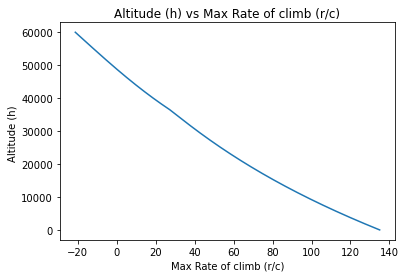

In [6]:
#4c

altitude = np.linspace(0,60000,10000) #create an array holding the altitude values
max_rc_list = [] #create an empty list to hold the max r/c values

for i in altitude: #create a for loop
    max_rc = max(rc(i,v)) #find the max r/c value
    max_rc_list.append(max_rc) #append to the list
    
plt.plot(max_rc_list, altitude)
plt.ylabel('Altitude (h) ')
plt.xlabel('Max Rate of climb (r/c)')
plt.title('Altitude (h) vs Max Rate of climb (r/c)')

close_rc0 = min(max_rc_list, key = lambda x:abs(x-0)) #give closest rc to rc = 0 #find values in list closest to zero
index_close_rc0 = max_rc_list.index(close_rc0) #altitude at 8127 for 0.00268 (close approx)
altitude[index_close_rc0] #gives altitude of absolute ceiling

#linearly interpolate to find actual rc = 0
def lin_interp(x,x0,x1,y0,y1):
    return ((y1-y0)/(x1-x0))*(x-x0)+y0

x0 = max_rc_list[index_close_rc0+1]
x1 = max_rc_list[index_close_rc0]
y0 = altitude[index_close_rc0+1]
y1 = altitude[index_close_rc0]
x = 0

abs_ceiling = lin_interp(x,x0,x1,y0,y1)
print(abs_ceiling)

#service ceiling calculations
close_rc100 = min(max_rc_list, key=lambda x:abs(x-(100/60))) #rc closeset to 100ft/min
index_close_rc100 = max_rc_list.index(close_rc100) #find the index of rc
altitude[index_close_rc100] #find the corresponding altitude

#linear interpolate to find actual rc = 100
x0 = max_rc_list[index_close_rc100]
x1 = max_rc_list[index_close_rc100+1]
y0 = altitude[index_close_rc100]
y1 = altitude[index_close_rc100+1]
x = 100/60

service_ceiling = lin_interp(x,x0,x1,y0,y1)
print(service_ceiling)



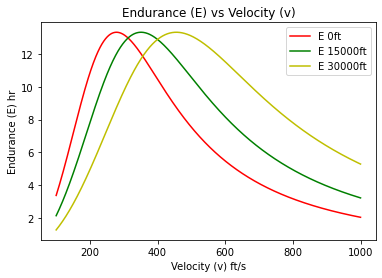

2.052566734382738
3.233375598697606
5.294820964351756


In [7]:

#Problem 5
wf = 7500 #lb
ct = 0.6 #lb/lb*hr
w1 = w0-wf

def E(h,v):
    h = h/3.281 #height to meters
    rho = Atmos1976(h)[2] * (1/515)
    cl = w0/ (.5*rho*(v**2)*sref)
    return (1/ct)*(cl/CD(cl))*np.log(w0/w1)

v = np.linspace(100, 1000, 1000)
plt.plot(v, E(0,v), 'r', label = 'E 0ft')
plt.plot(v, E(15000,v), 'g', label = 'E 15000ft')
plt.plot(v, E(30000,v), 'y', label = 'E 30000ft')
plt.ylabel('Endurance (E) hr')
plt.xlabel('Velocity (v) ft/s')
plt.title('Endurance (E) vs Velocity (v)')
plt.legend()
plt.show()

print(E(0,1000))
print(E(15000,1000))
print(E(30000,1000)) 



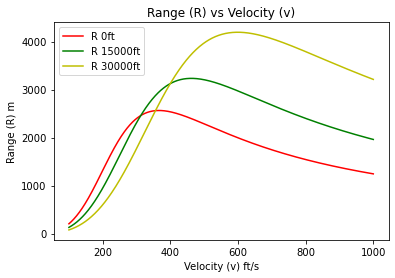

1245.5146607653937
1962.0393551540437
3212.941643630067


In [8]:
#5b
ct = 0.6/3600 #convert to s
def jetR(h,v):
    h = h/3.281 #height to meters
    rho1 = Atmos1976(h)[2] * (1/515)
    cl = w0/ (.5*rho1*(v**2)*sref)
    return (2*m.sqrt(2/(rho1*sref))*(1/ct)*((cl**0.5)/CD(cl))*(m.sqrt(w0) - m.sqrt(w1)))/5280

v = np.linspace(100, 1000, 1000)
plt.plot(v, jetR(0,v), 'r', label = 'R 0ft')
plt.plot(v, jetR(15000,v), 'g', label = 'R 15000ft')
plt.plot(v, jetR(30000,v), 'y', label = 'R 30000ft')
plt.ylabel('Range (R) m')
plt.xlabel('Velocity (v) ft/s')
plt.title('Range (R) vs Velocity (v)')
plt.legend()
plt.show()

print(jetR(0,1000))
print(jetR(15000,1000))
print(jetR(30000,1000)) 

In [1]:
2*3

6

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import math as m

def lin_interp(x,x0,x1,y0,y1):
    return ((y1-y0)/(x1-x0))*(x-x0)+y0
rhoE = lin_interp(4876,4800,4900,0.75247,0.74442) #at 4876 #km
print(rhoE)

0.746352
